# Lab 6
Working with datasets and regression models.

Regression models are essentialy finding ways in which data correlates, and attempts to fit a metric. In this lab we will be fitting regression models to data, looking at a few different types of regression, then using this on our datasets we gathered.
We will be using a data of plant growth data. 


In [ ]:
!pip install scikit-learn 
!pip install pandas
!pip install matplotlib

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, GammaRegressor, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

## Task 1 - Linear regression
### Load in the data
Lets plot the data to see what we are working with. If we load in the dataset we can see what the columns of the data is, so what you need to do is plot this data against one another.

In [2]:
df=pd.read_csv("plant_growth_data.csv")
df.dropna()
df.head()

,Water (ml/day),Plant Growth (cm)
0,50.000000,4.116310
1,59.183673,7.853251
2,68.367347,5.827844
3,77.551020,9.442442
4,86.734694,10.530373


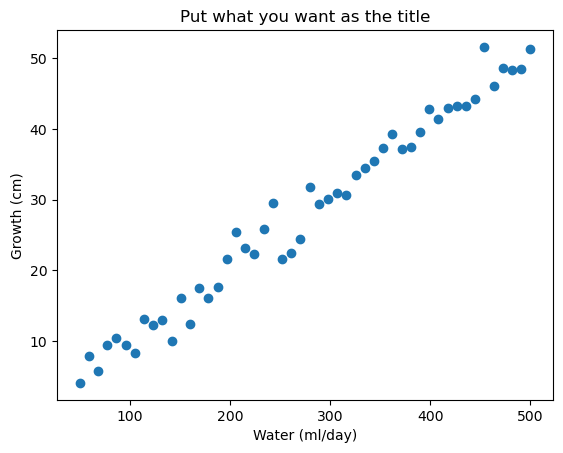

In [5]:
#load in the columns to variables
water=df['Water (ml/day)'].values
growth = df['Plant Growth (cm)'].values  #complete this! 

plt.scatter(water, growth) #complete this to plot the water against the growth
plt.xlabel("Water (ml/day)")
plt.ylabel("Growth (cm)")
plt.title("Put what you want as the title")
plt.show()

### Look at covariance between variables

What do you notice? Is there a strong correlation, a weak one? Are these variables related

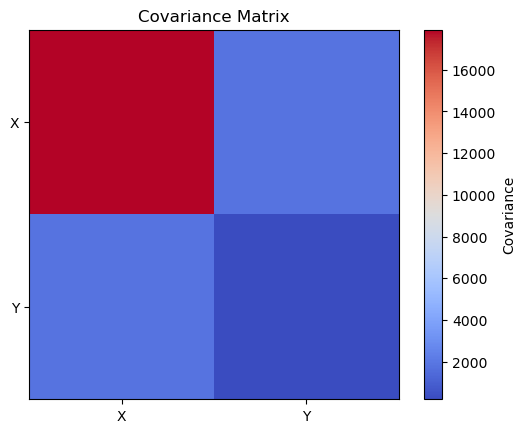

In [6]:

data = np.vstack((water, growth))
cov_matrix = np.cov(data)

# Plot covariance matrix
plt.imshow(cov_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.xticks([0, 1], ['X', 'Y'])
plt.yticks([0, 1], ['X', 'Y'])
plt.title('Covariance Matrix')
plt.show()

### Train a regression model

Lets train a regression model on this data. When we train a model we can import it from the scikit learn libray. When we train a model, we want to split the data into train and test datasets. The train dataset is the data that is used to train the model. We then have a test dataset of unseen data, we use this to see how the model performs on data it has not been trained on. This gives us an idea of how it will perform in the future. 

We then use the mean squared error as a metric to see how far off (on average) our model is. The lower this nuber, the better. 

In [ ]:
X = water.reshape #this should be your data (so water)
y = growth #this should be your labels (growth)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #this splits

#train the model
model = LinearRegression()
model.fit(X_train, y_train)

#work out how good the model is on the train data
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error:", mse)

#work out how good the model is on test data
y_pred = model.predict(...)
mse = mean_squared_error(..., y_pred)
print("Mean Squared Error:", mse)

AxisError: axis 1 is out of bounds for array of dimension 1

### Plot errors
Write code that shows the test data points, and the prediction data points for the test data. Show them as different colours

## Task 2 - multi linear regression
We might have more than one data input influencing a variable. We can use the linear regression model for more than one input. Lets say we have light and water as an input, can we use both to predict the growth?

In [ ]:
df=pd.read_csv("plant_growth_sunlight_data.csv")
df.head()

,Water (ml/day),Sunlight (hours/day),Plant Growth (cm)
0,50.000000,8.612790,5.624466
1,59.183673,5.073799,9.551416
2,68.367347,5.122153,9.916777
3,77.551020,4.362923,12.466862
4,86.734694,5.784216,11.674305


### Train multi-linear model
lets now train the model on more than one input

In [ ]:
sunlight = df[...]
water = df[...]
growth = df[...]

X = df[[...,...]] # concatenate the sunlight and water together so your data is in the format [[sunlight,water],[sunlight,water],...,[sunlight,water]]
y = growth
#now train your regression model again (copy the code from above)

...

### Visulise how your model is performing

In [ ]:
plt.scatter(X_test[:,0],y_test,label="Actual")
plt.scatter(X_test[:,0],y_pred,label="Predicted")
plt.legend(loc="lower right")
plt.xlabel("Water (ml/day)")
plt.ylabel("Growth (cm)")
plt.title("Water vs Growth")

## Task 3 
Try out the data you have prepared above on some other regression models
- ridge regression
- random forest regression
- Gamma Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #this splits

model = GammaRegressor(alpha=0.1, max_iter=10000)  # Alpha is the regularization parameter
model.fit(X_train, y_train)

... #make predictions on the test data
... #print the mean square error

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

... #make predictions on the test data
... #print the mean square error

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

... #make predictions on the test data
... #print the mean square error

### Do you notice anything?
Is there a model that works the best? Why is this the case? What happens when we play with parameters, are some models slower or use more memory? Have a google and try understand these results. 

## Task 3
Now you have regression models working on this dataset we can work on your gathered dataset. Complete the following tasks in the code cell below:
- Load in your dataset
- make a covariance matrix to investigate correlation of your data points
- Visualise the variables against one another. If more than 2 values to visualise think of a better way to show it than scatter graphs
- Train different regression models on your dataset, how does it perform on unseen data? 
- Think about conclusions from this, even if the model works does this mean your model is robust